In [1]:
# chapter 4 training models

# training linear regressions
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
# time to compute theta^
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

# should've have been theta(0) = 4 and theta(1) = 3 but noise affected ability
# because of formula y = 4 + 3x0

array([[ 3.59840364],
       [ 3.45129485]])

In [4]:
# time to plot this basic model's predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.59840364],
       [ 10.50099335]])

/Users/PhilipHouse/ml/envs/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


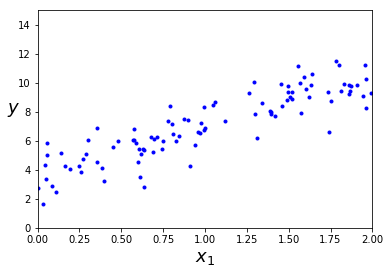

In [8]:
# time to plots
%matplotlib inline
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

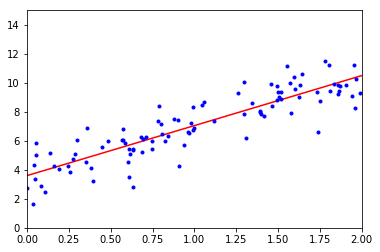

In [9]:
# let's plot predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
# time to mess with calculating gradient descent step
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization (selecting random theta)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[ 3.59840364],
       [ 3.45129485]])

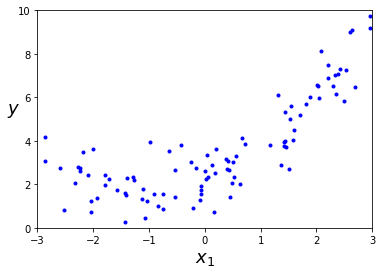

In [20]:
# time for some polynomial regressions
np.random.seed(2000)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# time to mess with logistic regression

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['target_names', 'target', 'DESCR', 'feature_names', 'data']

In [3]:
import numpy as np

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [4]:
# time to train the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

/Users/PhilipHouse/ml/envs/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


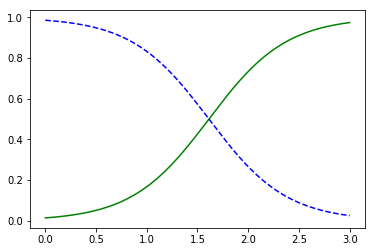

In [6]:
%matplotlib inline
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [7]:
# let's do multi-class detection using Softmax
X = iris["data"][:, (2, 3)]  # we are grabbing the petal length and petal width attributes here
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# let's predict what an iris with 5cm long and 2cm wide petals is
softmax_reg.predict([[5, 2]])

array([2])

In [9]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134079e-07,   5.75276066e-02,   9.42471760e-01]])